<a href="https://colab.research.google.com/github/abdulxs/computer-vision/blob/main/detect_and_annotate_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 1.6 MB/s eta 0:00:00


In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 9.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
import cv2
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")
image = cv2.imread("/content/Abdulgafar.jpeg")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER_OF_MASS)

annotated_image = mask_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)


0: 640x640 1 person, 1 chair, 627.6ms
Speed: 12.0ms preprocess, 627.6ms inference, 16.6ms postprocess per image at shape (1, 3, 640, 640)


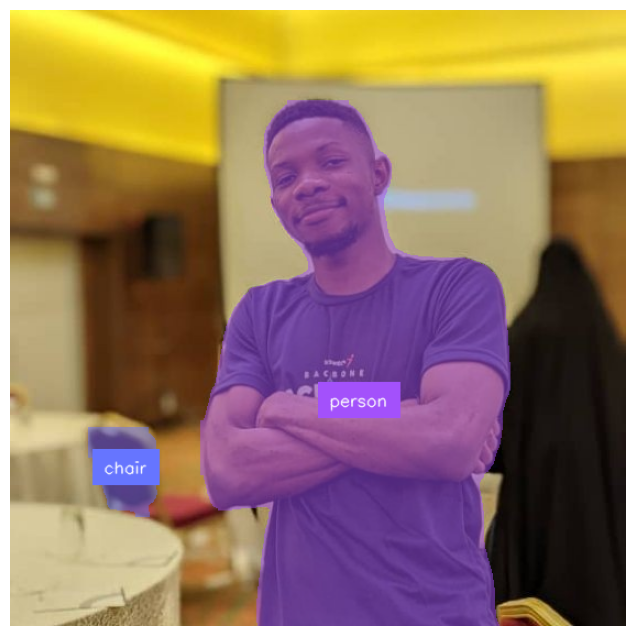

In [10]:
import matplotlib.pyplot as plt

# Convert BGR image to RGB (matplotlib expects RGB format)
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(annotated_image_rgb)
plt.axis('off')  # Hide axes
plt.show()